https://jovian.ai/aakashns/python-sklearn-logistic-regression

Problem Statement
This tutorial takes a practical and coding-focused approach. We'll learn how to apply logistic regression to a real-world dataset from Kaggle:

As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

EXERCISE: Before proceeding further, take a moment to think about how you can approach this problem. List five or more ideas that come to your mind below:

1. Analyze previous day variables in order to see if a correlation can be found.
2. Probabilidad de que si llovio hoy, llueva mañana. 
3. 
4. 
5. 

In [2]:
import pandas as pd

raw_df = pd.read_csv('weatherAUS.csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [3]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')


In [5]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [6]:
px.histogram(raw_df, #Si no llovió hoy es probable que no llueva mañana. Pero si llovió hoy que haya llovido mañana es casi un 50%.
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [7]:
px.scatter(raw_df.sample(2000), #Cuando llueve la temperatura minima y maxima del día están cerca.
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [8]:
px.scatter(raw_df.sample(2000), #Aca parece que alta humedad y baja temperatura implica buenas probabilidades de lluvia al otro día. 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [9]:
px.scatter(raw_df.sample(2000), #No parecería haber mucha correlacion con la presión, si con la humedad.
           title='Temp (3 pm) vs. Pressure (3 pm)',
           x='Humidity3pm',
           y='Pressure3pm',
           color='RainTomorrow')

In [10]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Pressure (3 pm)',
           x='Humidity9am',
           y='Pressure3pm',
           color='RainTomorrow')

In [11]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

In [12]:
px.scatter(raw_df.sample(2000), #Cuando llueve la temperatura minima y maxima del día están cerca.
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='Pressure3pm', 
           color='RainTomorrow')

In [14]:
from sklearn.model_selection import train_test_split #Para dividir la data
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42) #Le adjudicamos el 20% a la parte de testeo
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) 
#Del 80% restante lo dividimos en 75% para training y 25% validation

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


In [15]:
year = pd.to_datetime(raw_df.Date).dt.year #Al trabajar con fechas conviene partirla por fecha la data. 

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [16]:
input_cols = list(train_df.columns)[1:-1] 
#No nos interesa la primera columna, que es la fecha ni tampoco queremos ver la columna objetivo que es si llovio mañana
target_col = 'RainTomorrow'

In [17]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [18]:
import numpy as np
numeric_cols = train_inputs.select_dtypes(include= np.number).columns.to_list()
categorical_cols = train_inputs.select_dtypes(include = 'object').columns.to_list()


In [19]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [20]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
#le imputamos la media a los valores faltantes. También podria ser la mediana para evitar outliers

print(raw_df[numeric_cols].isna().sum())

imputer.fit(raw_df[numeric_cols]) 
#Le estamos diciendo que calcule la media de cada columna. Despues se lo vamos a asignar a los faltantes. 

#Fit y transform. 

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

train_inputs[numeric_cols]

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0     5.472516   7.63054           43.0   
144549     15.1     36.8       0.0     5.472516   7.63054           31.0   
144550     17.3     37.8       0.0     5.472516   7.63054           39.0   
144551     20.1     38.5       0.0     5.472516   7.63054           43.0   
144552     22.5     39.6       0.0     5.472516   7.63054           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1  8.000000   4.49925     16.9     21.8  
1            1007.8  4.431161   4.49925     17.2     24.3  
2            1008.7  4.431161   2.00000     21.0     23.2  
3            1012.8  4.431161   4.49925     18.1     26.5  
4            1006.0  7.000000   8.00000     17.8     29.7  
...             ...       ...       ...      ...      ...  
144548       1009.8  4.431161   4.49925     23.7     31.8  
144549       1007.6  4.431161   4.49925     28.9     34.8  
144550       1008.0  4.431161   4.49925     29.7     35.7  
144551       1009.2  4.431161   4.49925     29.8     37.2  
144552       1006.2  4.431161   4.49925     30.1     37.4  

[97988 rows x 16 columns]

In [22]:
from sklearn.preprocessing import MinMaxScaler 
#Que los valores sean de 0 a 1 

scaler = MinMaxScaler()

scaler.fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [23]:
train_inputs[numeric_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0            0.4800  0.888889  0.499917  0.508439  0.522073  
1            0.4912  0.492351  0.499917  0.514768  0.570058  
2            0.5056  0.492351  0.222222  0.594937  0.548944  
3            0.5712  0.492351  0.499917  0.533755  0.612284  
4            0.4624  0.777778  0.888889  0.527426  0.673704  
...             ...       ...       ...       ...       ...  
144548       0.5232  0.492351  0.499917  0.651899  0.714012  
144549       0.4880  0.492351  0.499917  0.761603  0.771593  
144550       0.4944  0.492351  0.499917  0.778481  0.788868  
144551       0.5136  0.492351  0.499917  0.780591  0.817658  
144552       0.4656  0.492351  0.499917  0.786920  0.821497  

[97988 rows x 16 columns]

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder.fit(raw_df[categorical_cols])
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [25]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) 
#Nos trae los nombres de las nuevas columnas. 

encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [26]:
#Creamos las nuevas columnas y les asignamos el valor del encoder 1 o 0

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

train_inputs

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\1034691139.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\1034691139.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\1034691139.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
0                W       0.294574          W        WNW  ...            0.0   
1              WNW       0.294574        NNW        WSW  ...            0.0   
2              WSW       0.310078          W        WSW  ...            0.0   
3               NE       0.139535         SE          E  ...            0.0   
4                W       0.271318        ENE         NW  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
144548         SSE       0.286822        ESE        SSE  ...            0.0   
144549          NE       0.193798        ENE         SW  ...            0.0   
144550         ESE       0.255814        ESE        SSE  ...            0.0   
144551         ESE       0.286822        ESE        SSW  ...            0.0   
144552         WNW       0.542636        ENE        SSW  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
144548            0.0  
144549            0.0  
144550            0.0  
144551            0.0  
144552            0.0  

[97988 rows x 123 columns]

In [27]:
"""
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')
"""

"\ntrain_inputs.to_parquet('train_inputs.parquet')\nval_inputs.to_parquet('val_inputs.parquet')\ntest_inputs.to_parquet('test_inputs.parquet')\npd.DataFrame(train_targets).to_parquet('train_targets.parquet')\npd.DataFrame(val_targets).to_parquet('val_targets.parquet')\npd.DataFrame(test_targets).to_parquet('test_targets.parquet')\n"

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

model.fit(train_inputs[numeric_cols + encoded_cols], train_targets) 
#Input no pueden ser categorical, targets si. No = 0 Si = 1.           

  

LogisticRegression(solver='liblinear')

<Axes: xlabel='weight', ylabel='features'>

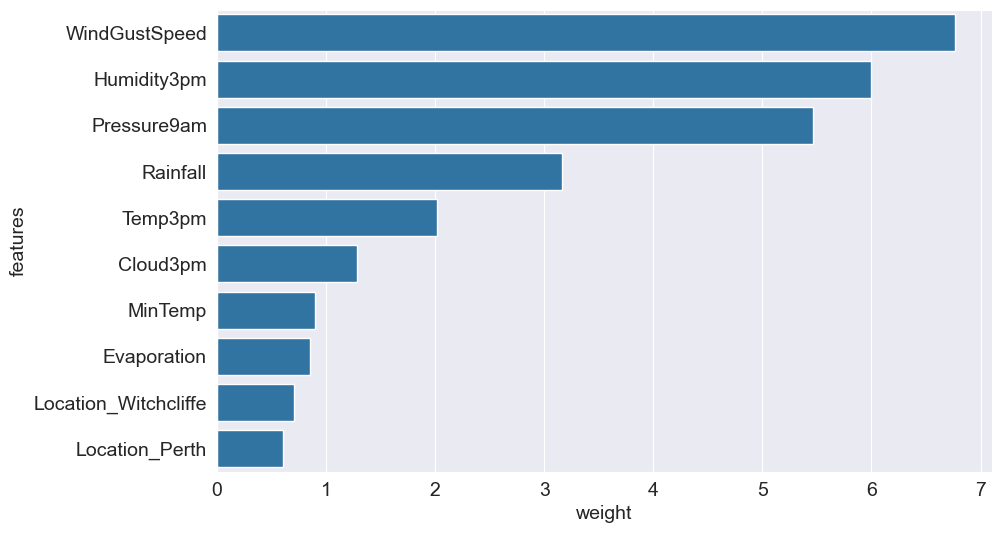

In [29]:
weight_df = pd.DataFrame({
    'features': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
}) 

sns.barplot(data=weight_df.sort_values(by= 'weight', ascending= False).head(10), x='weight', y='features')

In [30]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(X_train)
train_prob = model.predict_proba(X_train)




In [32]:
print(model.classes_,
      train_prob)

['No' 'Yes'] [[0.94401116 0.05598884]
 [0.94074153 0.05925847]
 [0.96093612 0.03906388]
 ...
 [0.98749113 0.01250887]
 [0.98334678 0.01665322]
 [0.87453425 0.12546575]]


In [33]:
accuracy_score(train_preds, train_targets)

0.8519206433440829

In [34]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [35]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs) #Le pasamos el input para que prediga el modelo
    
    accuracy = accuracy_score(targets, preds) #comparamos el objetivo con lo predicho para ver el % de acierto.
    print(f"Accuracy: {round(accuracy * 100,2)}%")
    
    cf = confusion_matrix(targets, preds, normalize='true') #Calculamos la matrix de confusion con lo predicho y los objetivos
    plt.figure()
    sns.heatmap(cf, annot=True) #mapa de calor con los datos de la matrix.
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix') #Detalle para el titulo. 
    
    return preds #Retorna la prediccion por si la queremos guardar. 

Accuracy: 85.19%


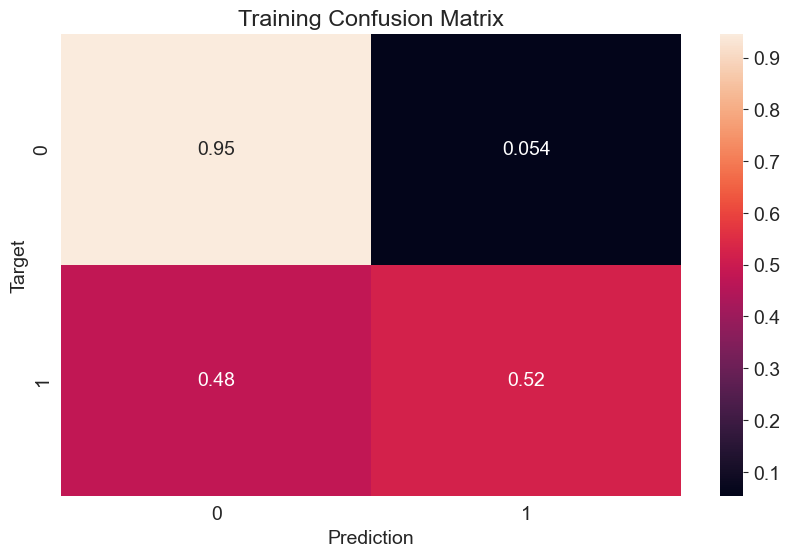

In [47]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.4%


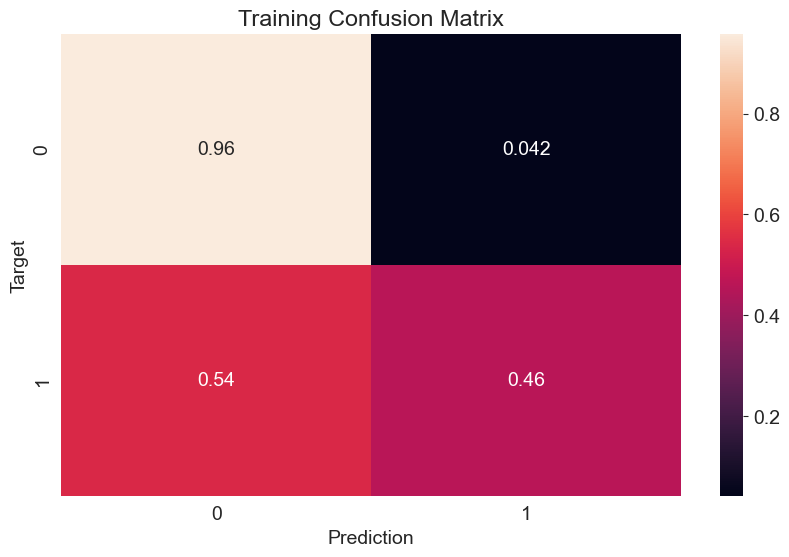

In [37]:
val_preds = predict_and_plot(X_val, val_targets, 'Training')

Accuracy: 84.2%


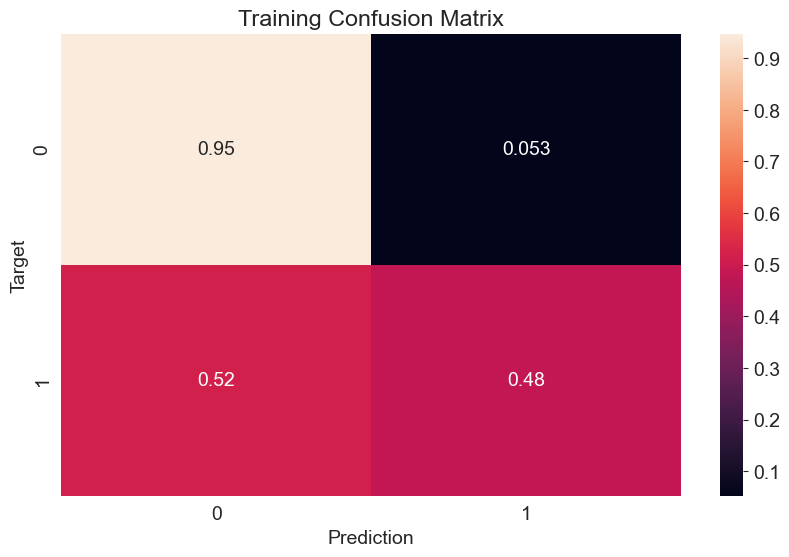

In [38]:
test_preds = predict_and_plot(X_test, test_targets, 'Training')

In [39]:
def all_no(inputs): #Creamos modelos aleatorios para comparar con el acierto de los modelos. 
    return np.full(len(inputs), "No")
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

accuracy_score(test_targets, random_guess(X_test))


0.5040840140023337

In [40]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [41]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

new_input_df = pd.DataFrame([new_input])

new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\2750466156.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\2750466156.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\2750466156.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0           0.1      0.229885         0.89         0.58  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

In [42]:
prediction = model.predict(X_new_input)[0]
prediction_proba = model.predict_proba(X_new_input)[0][1]

prediction, prediction_proba

('Yes', 0.5189748373898185)

In [43]:
list(model.classes_).index('No')

0

In [44]:
def predict_new (input):
    new_input_df = pd.DataFrame([input])
    new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
    new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
    new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])
    X_new_input = new_input_df[numeric_cols + encoded_cols]
    prediction = model.predict(X_new_input)[0]
    prediction_proba = model.predict_proba(X_new_input)[0][list(model.classes_).index(prediction)] 
    #Aca traemos el valor que da la prediccion para saber su probabilidad.

    return prediction, prediction_proba

new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 3.2,
             'MaxTemp': 23.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 23.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1014.8,
             'Pressure3pm': 1011.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_new(new_input)

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\2016267664.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\2016267664.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\lucat\AppData\Local\Temp\ipykernel_11568\2016267664.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

('No', 0.6085442079885582)

In [45]:
import joblib 

#Guardamos el modelo para no tener que entrenarlo cada vez. Podemos abrir otro archivo y cargarlo y listo.

aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [46]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8420070011668611